In [1]:
import torch
import sys
import os
import pandas as pd
from scipy import misc
from torchvision import transforms
from torch.utils.data import Dataset

from torch.utils.data import DataLoader
import numpy as np
import imageio
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

from sklearn.metrics import roc_auc_score, roc_curve

from model import *
from AliLoader import *

In [2]:
LS = 128 #Latent Space Size
batch_size = 24
ColorsNumber = 1

#Encoder param
EncKernel = [5,4,4,4,4,1,1]
EncStride = [1,2,1,2,1,1,1]
EncDepth = [32,64,128,256,512,512,LS]

#Generator param
GenKernel = [4,4,4,4,5,1,1]
GenStride = [1,2,1,2,1,1,1]
GenDepth = [256,128,64,32,32,32,ColorsNumber]

#Discriminator X param
DxKernel = [5,4,4,4,4]
DxStride = [1,2,1,2,1]
DxDepth = [32,64,128,256,512]

#Discriminator Z param
DzKernel = [1,1]
DzStride = [1,1]
DzDepth = [512,512]

#Concat Discriminator param
DxzKernel = [1,1,1]
DxzStride = [1,1,1]
DxzDepth = [1024,1024,1]



In [3]:
datadir = "./images/"


In [4]:
# Transformations
inputsize = [224, 224]
inputsize = [32,32]
data_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(inputsize),
    transforms.ToTensor(),
    #transforms.Lambda(lambda x: x.repeat(3, 1, 1))
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Initialize dataloader
dataset = XrayDataset(datadir, transform=data_transforms)
dataloader = DataLoader(dataset, shuffle=True, batch_size=batch_size)

print(len(dataset))

501


torch.Size([1, 1, 32, 32])


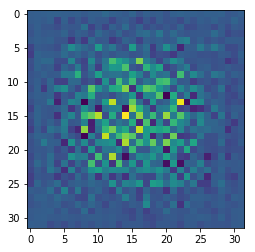

In [5]:


    
    
GenX = Generator(latent_size=LS,KS=GenKernel,ST=GenStride,DP=GenDepth)
fkim = GenX(torch.rand(1,LS,1,1))
print(fkim.shape)
plt.imshow(fkim.detach().numpy()[0][0])
plt.show()

In [6]:
class Maxout(nn.Module):
    def __init__(self, pool_size):
        super().__init__()
        self._pool_size = pool_size

    def forward(self, x):
        assert x.shape[-1] % self._pool_size == 0, \
            'Wrong input last dim size ({}) for Maxout({})'.format(x.shape[-1], self._pool_size)
        m, i = x.view(*x.shape[:-1], x.shape[-1] // self._pool_size, self._pool_size).max(-1)
        return m

In [7]:
#torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)


In [8]:
import torch.optim as optim




DisX = DiscriminatorX(KS=DxKernel,ST=DxStride,DP=DxDepth)
DisZ = DiscriminatorZ(KS=DzKernel,ST=DzStride,DP=DzDepth,LS=LS)
DisXZ = DiscriminatorXZ(KS=DxzKernel,ST=DxzStride,DP=DxzDepth)

GenZ = Encoder(KS=EncKernel,ST=EncStride,DP=EncDepth,LS=LS)
GenX = Generator(latent_size=LS,KS=GenKernel,ST=GenStride,DP=GenDepth)

if torch.cuda.is_available():
    DisX = DiscriminatorX(KS=DxKernel,ST=DxStride,DP=DxDepth).cuda()
    GenX = Generator(latent_size=LS,KS=GenKernel,ST=GenStride,DP=GenDepth).cuda()
    


In [9]:
for dataiter in dataloader:
    #Get Data
    data = dataiter
    data_norm = data*2.0-1.0
    break

In [10]:


lr = 1e-4
b1 = 0.5
b2 = 1e-3
optimizerG = optim.Adam([{'params' : GenX.parameters()},
                         {'params' : GenZ.parameters()}], lr=lr, betas=(b1,b2))

optimizerD = optim.Adam([{'params' : DisZ.parameters()},{'params': DisX.parameters()},
                         {'params' : DisXZ.parameters()}], lr=lr, betas=(b1,b2))

DiscriminatorLoss = []


1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


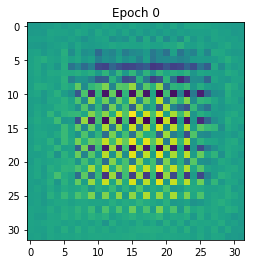

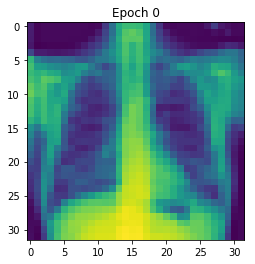

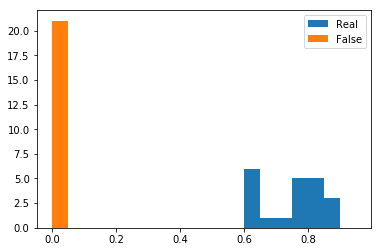

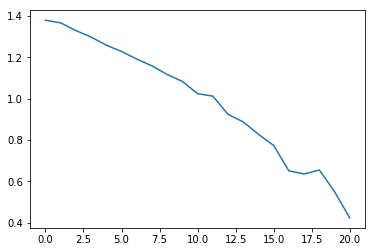

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


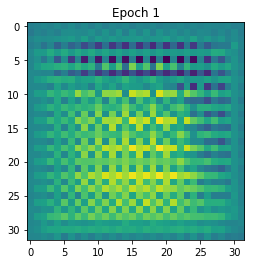

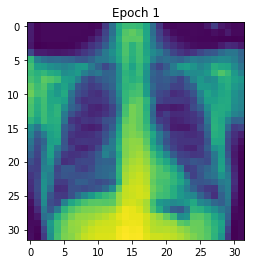

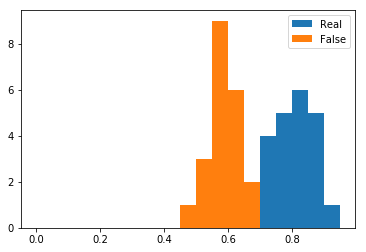

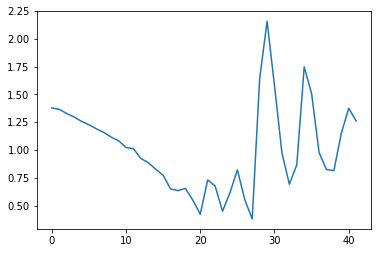

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


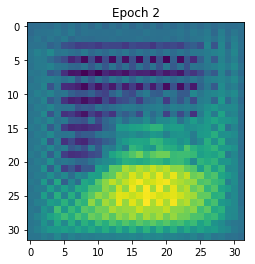

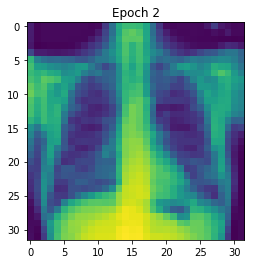

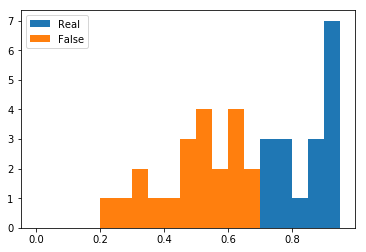

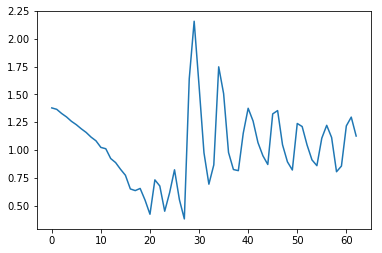

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


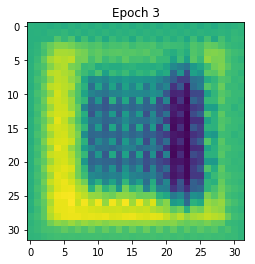

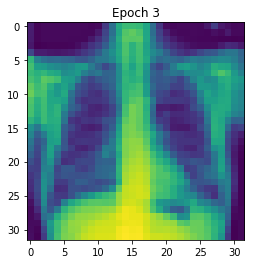

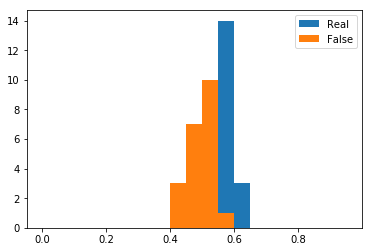

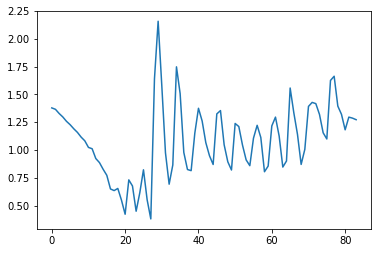

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


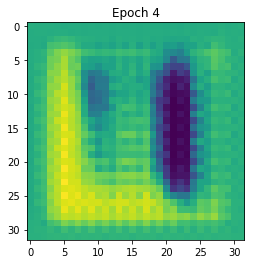

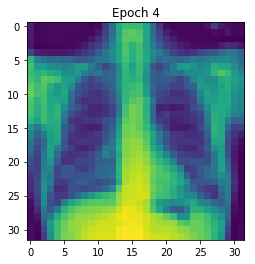

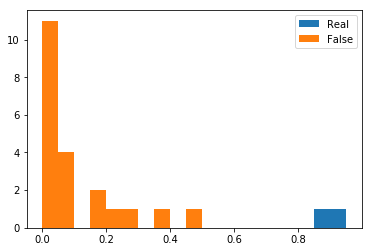

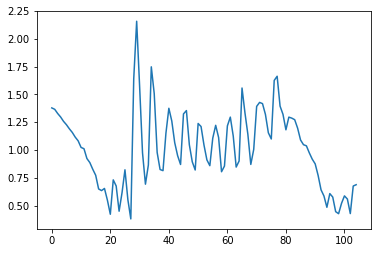

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


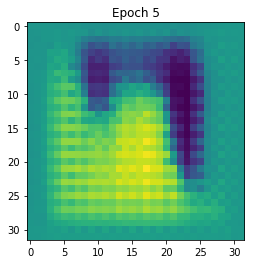

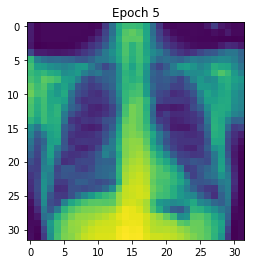

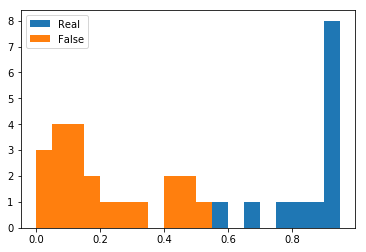

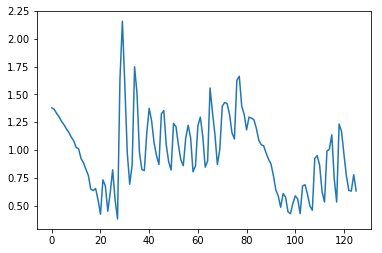

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


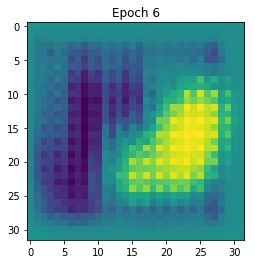

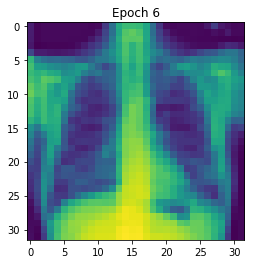

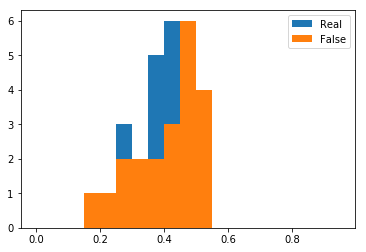

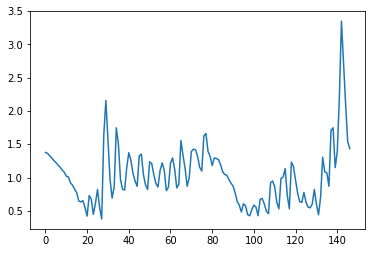

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


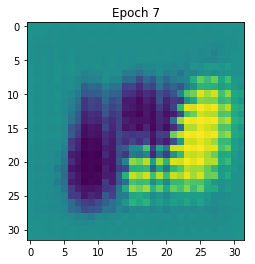

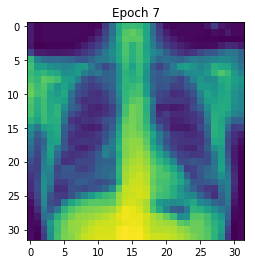

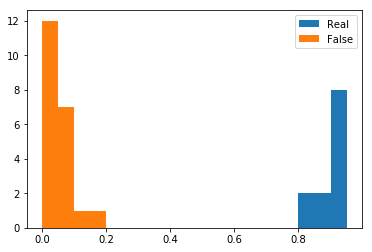

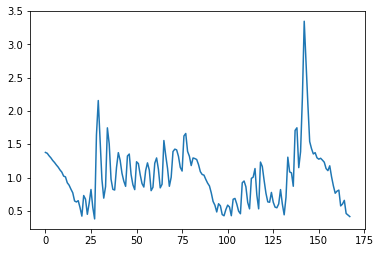

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


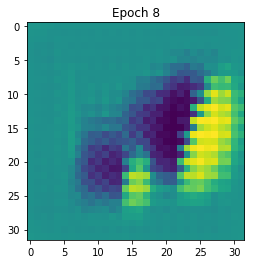

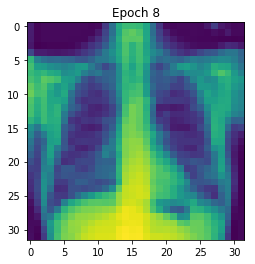

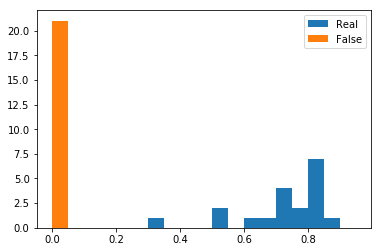

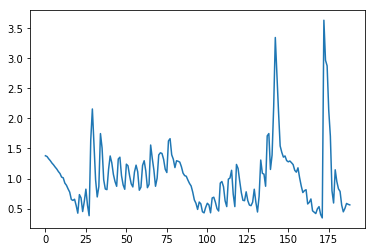

1 torch.Size([24, 1, 32, 32])
2 torch.Size([24, 1, 32, 32])
3 torch.Size([24, 1, 32, 32])
4 torch.Size([24, 1, 32, 32])
5 torch.Size([24, 1, 32, 32])
6 torch.Size([24, 1, 32, 32])
7 torch.Size([24, 1, 32, 32])
8 torch.Size([24, 1, 32, 32])
9 torch.Size([24, 1, 32, 32])
10 torch.Size([24, 1, 32, 32])
11 torch.Size([24, 1, 32, 32])
12 torch.Size([24, 1, 32, 32])
13 torch.Size([24, 1, 32, 32])
14 torch.Size([24, 1, 32, 32])
15 torch.Size([24, 1, 32, 32])
16 torch.Size([24, 1, 32, 32])
17 torch.Size([24, 1, 32, 32])
18 torch.Size([24, 1, 32, 32])
19 torch.Size([24, 1, 32, 32])
20 torch.Size([24, 1, 32, 32])
21 torch.Size([21, 1, 32, 32])


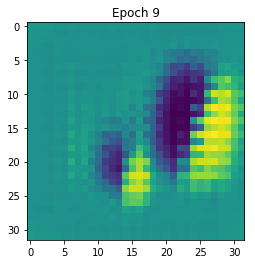

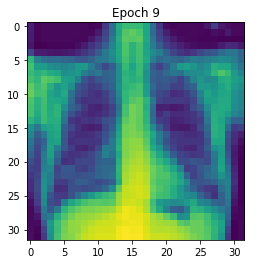

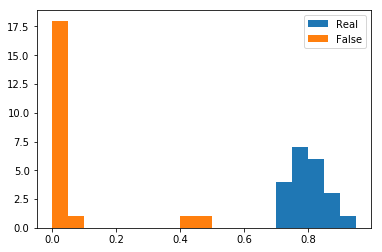

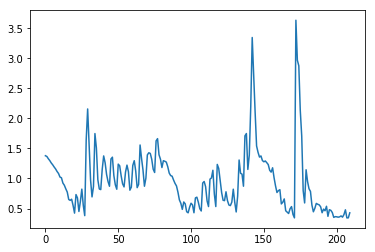

In [11]:
from torch.autograd import Variable


ConstantZ = torch.randn(9,LS,1,1)

cpt = 0

criterion = nn.BCELoss()
for epoch in range(10):
    
    #Store Discriminator data
    AllRealDisc = []
    AllFakeDisc = []
    
    
    c = 0
    for dataiter in dataloader:
        c += 1
        
        #Get Data
        Xnorm = dataiter *2.0 - 1.0
        print(c,Xnorm.shape)
        #To cuda
        if torch.cuda.is_available():
            Xnorm = Xnorm.cuda()
        
        #Get Batch Size
        BS = Xnorm.shape[0]
        if BS < batch_size/2.0:
            continue
        
        #Generate Fake data from random Latent
        FakeZ = torch.randn(BS,LS,1,1)
        FakeX = GenX(FakeZ)
        
        #Generate Latent from Real
        RealZ = GenZ(Xnorm)
        
        #Have discriminator do is thing on real and fake data
        RealCat= torch.cat((DisZ(RealZ), DisX(Xnorm)), 1)
        FakeCat= torch.cat((DisZ(FakeZ), DisX(FakeX)), 1)
        PredReal  = DisXZ(RealCat)
        PredFalse = DisXZ(FakeCat)
        
        #Get loss for discriminator
        loss_d = criterion(PredReal.view(-1), Variable(torch.ones(BS)-0.1)) + criterion(PredFalse.view(-1), Variable(torch.zeros(BS)))

        #Get loss for generator
        loss_g = criterion(PredFalse.view(-1), Variable(torch.ones(BS)-0.1)) + criterion(PredReal.view(-1), Variable(torch.zeros(BS)))

        #Optimize Discriminator
        
        optimizerD.zero_grad()
        loss_d.backward(retain_graph=True)
        optimizerD.step()
    
        #Optimize Generator
        
        optimizerG.zero_grad()
        loss_g.backward()
        optimizerG.step()
    
    
        #StoreInfo
        DiscriminatorLoss.append(loss_d.detach().numpy()+0)
        AllRealDisc = list(np.ravel(PredReal.detach().numpy()))
        AllFakeDisc = list(np.ravel(PredFalse.detach().numpy()))
        
        
        #break
        
    if epoch % 1 == 0:
        with torch.no_grad():
            FakeData = GenX(ConstantZ).detach().numpy()
            plt.imshow(FakeData[0][0])
            plt.title("Epoch %d" % (epoch))
            plt.show()

            plt.imshow(data[0][0])
            plt.title("Epoch %d" % (epoch))
            plt.show()


            #print("Epoch:%d AUC:%.2f" % (epoch,auc))

            plt.hist(AllRealDisc,bins=np.array(range(20))/20,label="Real")
            plt.hist(AllFakeDisc,np.array(range(20))/20,label="False")
            plt.legend()
            plt.show()


            plt.plot(range(len(DiscriminatorLoss)),DiscriminatorLoss)
            plt.show()

    #break

In [12]:
c

21

In [13]:
FakeData.shape

(9, 1, 32, 32)

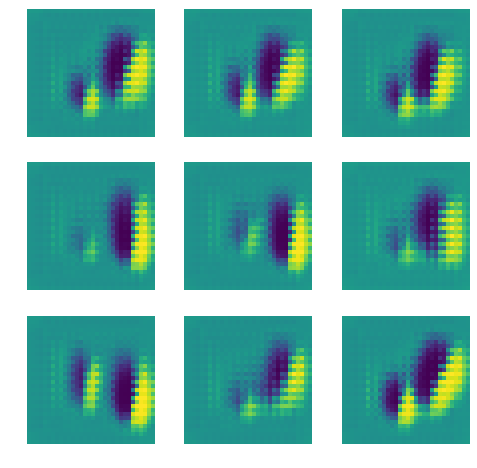

In [14]:
FakeData = GenX(ConstantZ).detach().numpy()
plt.figure(figsize=(8,8))

c = 0
for fd in FakeData:
    c +=1
    #print(fd.shape)
    plt.subplot(3,3,c)
    plt.imshow(fd[0])
    plt.axis("off")
plt.show()

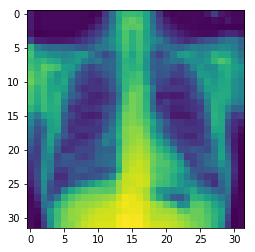

In [15]:
plt.imshow(data[0][0])

In [16]:
(GenX(ConstantZ).detach().numpy()[0][0])

array([[0.08615661, 0.07097156, 0.07395946, ..., 0.05611476, 0.06042922,
        0.06690367],
       [0.05318044, 0.04611864, 0.04376935, ..., 0.02088582, 0.0210208 ,
        0.02870755],
       [0.04006198, 0.03586991, 0.03409842, ..., 0.01603229, 0.01924432,
        0.02873022],
       ...,
       [0.04929343, 0.03820331, 0.02922015, ..., 0.02193791, 0.03141456,
        0.04108385],
       [0.05375454, 0.03833516, 0.02881056, ..., 0.0259823 , 0.04544534,
        0.05483589],
       [0.08332189, 0.0567203 , 0.05940091, ..., 0.05073803, 0.06467129,
        0.0857024 ]], dtype=float32)

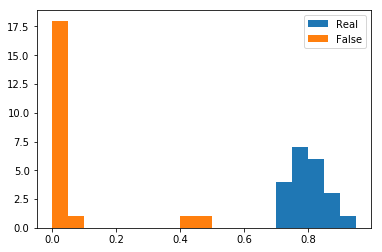

In [17]:
plt.hist(AllRealDisc,bins=np.array(range(20))/20,label="Real")
plt.hist(AllFakeDisc,np.array(range(20))/20,label="False")
plt.legend()
plt.show()

(array([ 48.,  36.,  25.,  44., 161., 577.,  38.,  32.,  33.,  30.]),
 array([-9.8613775e-01, -7.8892308e-01, -5.9170836e-01, -3.9449370e-01,
        -1.9727902e-01, -6.4343214e-05,  1.9715033e-01,  3.9436501e-01,
         5.9157968e-01,  7.8879440e-01,  9.8600906e-01], dtype=float32),
 <a list of 10 Patch objects>)

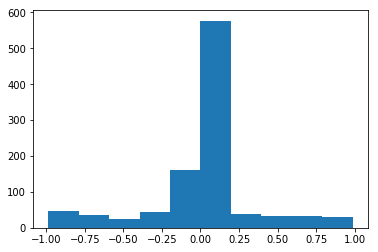

In [18]:
plt.hist(np.ravel(FakeData[0][0]))